In [14]:
# import the necessary packages
# the imutils package is a collection of convenience functions
# to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV and both Python 2.7 and Python 3
import skimage.io as io
from imutils import paths
from skimage.feature import local_binary_pattern
from skimage.feature import hog
import numpy as np
from skimage import exposure
from skimage import feature
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import argparse
import cv2
import csv
import os
from os import walk
# for io.imshow we need to import it from skimage
# the syntax is import skimage.io as io
# linearsvc is a linear support vector machine and needs to be imported from sklearn.svm
# the syntax is from sklearn.svm import LinearSVC
# labelencoder is a label encoder and needs to be imported from sklearn.preprocessing
# the syntax is from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
# import sklearn.svm.SVC
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
# for pickle we need to import it from sklearn.externals
# the syntax for pickle is import pickle
import pickle
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.set_printoptions(threshold=sys.maxsize)
import joblib


In [15]:
import os
import numpy as np
# import cv2
import cv2 as cv2
# import cv2.cv2 as cv2

from scipy import ndimage as ndi
import imageio
from os import walk
from pyefd import elliptic_fourier_descriptors
from skimage import feature
import pandas as pd
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,GridSearchCV  
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns;
import collections
import joblib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import skew
from skimage import segmentation
from skimage.filters import sobel
sns.set()
np.random.seed(42)



In [16]:
# use hog implemented in skimage.feature





# def get_hog():
#     # get images from images array, convert to grayscale
#     # and resize to 200x200 

#     # try:
#     #     os.remove("HOG_PCA_FEATURES.csv")
#     # except OSError:
#     #     pass  

#     # features_file = open("HOG_PCA_FEATURES.csv", "w", newline='')
#     labels = []
#     pca_features = []
    


#     for imagePath in os.listdir("Image-Segmentation2"):
#         # extract the label from the image path
#         # we can get the label from the image name as the label is the first char of the image name
#         # for example, the label of image 1_1.jpg is 1
#         labels.append((int)(imagePath.split(os.path.sep)[-1][0]))
        
#         # load the image, convert it to grayscale, and detect
#         # edges in it
#         image = cv2.imread("Image-Segmentation/" + imagePath)
        
#         # extract Histogram of Oriented Gradients from the
#         # test image
#         # display the original image
#         # if the image exists, display it and count the number of images
#         if image is not None:
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#             image = cv2.resize(image, (461, 260))
#             (H, hogImage) = feature.hog(image, orientations=9,  pixels_per_cell=(32, 32), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True, feature_vector=True)
#             # H = H.reshape(-1, 1)
#             # pca = PCA(0.8).fit(H)
#             # components = pca.transform(H)
#             pca_features.append(H)

            

#             # store the label and features in the csv file
#             #csv.writer(features_file).writerow([labels[-1], pca_features])

#     return pca_features, np.array(labels)        

def get_hog():
    print("HOG\n")
    file  = open(r"./Feature-Extraction/Histogram-of-Oriented-Gradients.txt", "w")
    lstFiles = []  # nombre de imagenes
    path = r"./Image-Segmentation2"
    for (path, _, archivos) in walk(path):
        for arch in archivos:
            (nomArch, ext) = os.path.splitext(arch)
            if (ext == ".JPG"):
                lstFiles.append(nomArch + ext)
                direc = path + "/" + nomArch + ext
                name = nomArch + ext
                # print(nomArch + ext)
                img_binary = cv2.imread(direc)

                image = cv2.imread("Image-Segmentation2/" + arch)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (461, 260))
                
                (H, hogImage) = feature.hog(image, orientations=9,  pixels_per_cell=(32, 32), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True, feature_vector=True)

                    
                file.write(name)
                for item in range(len(H)):
                    file.write(",%.3f" % H[item])
                file.write("," + name[0] + "\n")
    file.close()

def HOG_PCA():
    data_HOG = pd.read_csv(r'./Feature-Extraction/Histogram-of-Oriented-Gradients.txt', sep=',', header=None)
    file2 = open(r"./Feature-Extraction/Histogram-of-Oriented-Gradients-PCA.txt", "w")
    file2_3 = open(r"./Feature-Extraction/Histogram-of-Oriented-Gradients-PCA-2-3.txt", "w")
    file3_4 = open(r"./Feature-Extraction/Histogram-of-Oriented-Gradients-PCA-3-4.txt", "w")
    name_HOG = data_HOG.iloc[:, 0]
    value_HOG = data_HOG.iloc[:, 1:-1]
    tag_HOG = data_HOG.iloc[:, -1] # 0,1,2,3,4,5
    print("PCA")
    pca = PCA(0.97).fit(value_HOG)
    joblib.dump(pca, r"./Feature-Extraction/pca.pkl")
    
    components = pca.transform(value_HOG)
    print(components.shape)
    for row in range(len(components)):
        if(name_HOG[row][0] == '2' or name_HOG[row][0] == '3'):
            file2_3.write(name_HOG[row])
            for colm in range(len(components[row])):
                file2_3.write(",%.4f" %components[row][colm])
            file2_3.write(",%s" %tag_HOG[row] + "\n")
        if(name_HOG[row][0] == '3' or name_HOG[row][0] == '4'):
            file3_4.write(name_HOG[row])
            for colm in range(len(components[row])):
                file3_4.write(",%.4f" %components[row][colm])
            file3_4.write(",%s" %tag_HOG[row] + "\n")
        file2.write(name_HOG[row])
        for colm in range(len(components[row])):
            file2.write(",%.4f" %components[row][colm])
        file2.write(",%s" %tag_HOG[row] + "\n")
    file2.close()
    file2_3.close()
    file3_4.close()

#pca_features, labels = get_hog()
get_hog()
HOG_PCA()

HOG

PCA
(1821, 485)


The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.73
The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.78
The best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.74


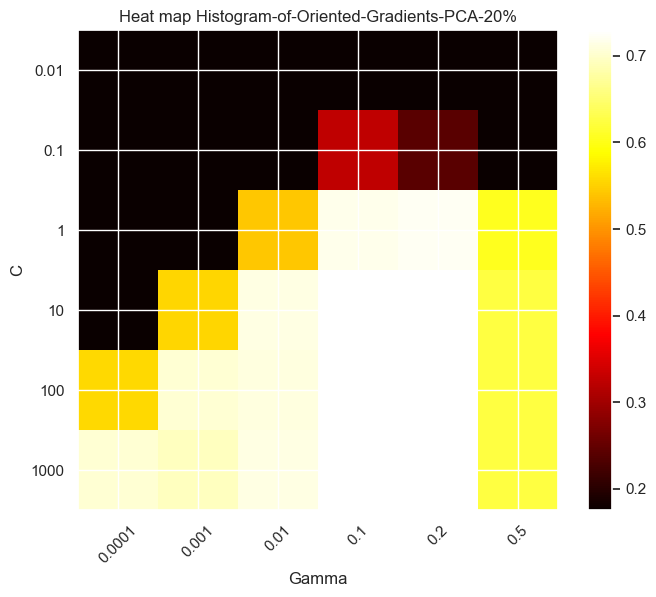

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.2, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.01, 'gamma': 0.5, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.326 (+/-0.006) para {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.242 (+/-0.007) para {'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.175 (+/-0.000) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.543 (+/-0.064) para {'C': 1, 'gamma': 0.01

c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


TAG
0    189
1    193
2    197
3    204
4    189
5    192
Name: TAG, dtype: int64
TAG
0    47
1    48
2    50
3    51
4    48
5    48
Name: TAG, dtype: int64 Counter({'3': 55, '1': 49, '4': 49, '0': 48, '5': 47, '2': 44})
<bound method BaseSearchCV.score of GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']}])>


c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy: 0.7479452054794521
Accuracy: 0.728
Accuracy: 0.6854838709677419


c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


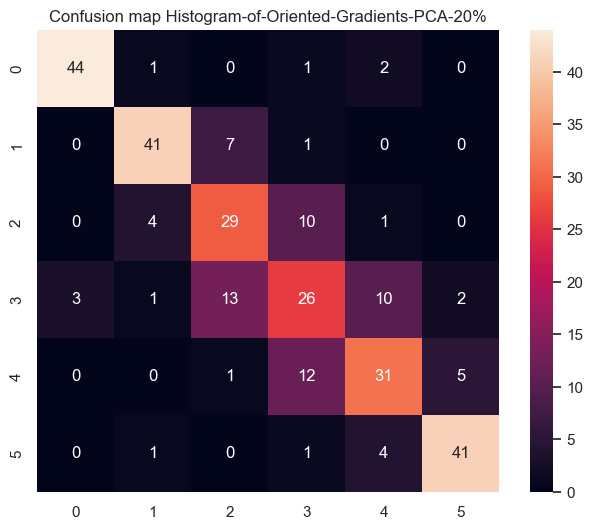

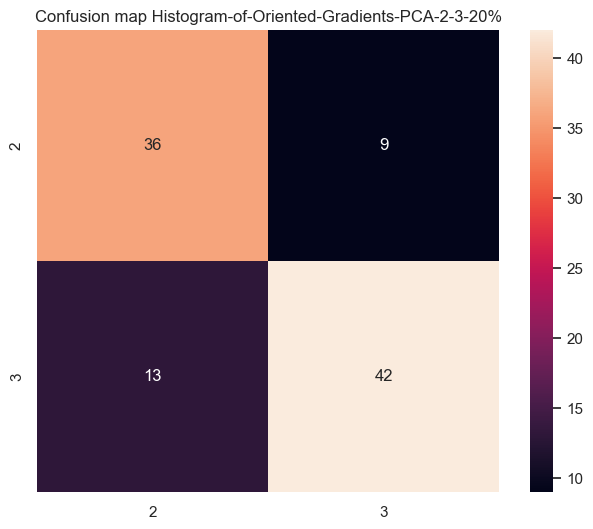

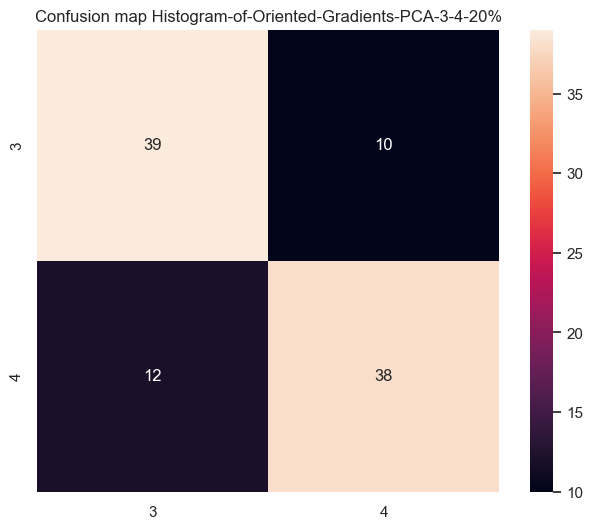

In [17]:
#As the first method of classification we use Support Vector Machine 


from sklearn.linear_model import SGDClassifier


base = "./"

def SVMutilities(txt,test_percentage):
    pathsvm = base + "Feature-Extraction/SVM"
    
    if not os.path.exists(pathsvm):
        os.makedirs(pathsvm)
        
    data = pd.read_csv(base + '/Feature-Extraction/'+txt+'.txt',sep=',',header=None)
    
    # we shuffle it for better performance 
    # data=shuffle(data, random_state=42)
    
    s=data.shape
    # print(s)
    col=[]
    #data.columns = ["a", "b", "c", "etc."]
     
    for x in range(0, s[1]):
        if x==0:
            col.append("NAME")
        elif x ==s[1]-1:
            col.append("TAG")
        else:
            col.append("VALOR-"+str(x))
    
    #se asigna el vector con los nombres de las columnas creado previamente y se las asignamos a la tabla
    data.columns = col
    
    ##print(data.groupby(['TAG'])['TAG'].count())
    vals_to_replace = { '0':'0', '1':'1', '2':'2', '3':'3', '4':'4', '5':'5',
                         0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5'}
    
    data['TAG'] = data['TAG'].map(vals_to_replace)
    
    #print(data.tail())
    
    no_col=['NAME','TAG']
    #obtener todas las columnas
    allValuesName = [x for x in col if x not in no_col]
    #se obtienen solo los coefficientes
    value=data[allValuesName]
    # print value type
    # print(type(value))
    # convert to float
    # value=value.astype(float)
    
    tags=data[col[-1]] #columna de tags
    
    data['gender'] = data['NAME'].map(lambda x: 'woman' in x.lower())
    
    # i added a stratify to the train_test_split to make sure that the train and test sets have the same proportion of class labels as the input data
    # its based on gender
    X_train, X_test, Y_train, Y_test = train_test_split(value,tags,test_size=test_percentage,stratify=data['gender'], random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=test_percentage,stratify=Y_train, random_state=42)
    
    return X_train, X_test, Y_train, Y_test, X_val, Y_val

def SVM(txt,test_percentage):

    X_train, X_test, Y_train, Y_test, X_val, Y_val = SVMutilities(txt,test_percentage)
    X_train2_3, X_test2_3, Y_train2_3, Y_test2_3, X_val2_3, Y_val2_3 = SVMutilities(txt+"-2-3",test_percentage)
    X_train3_4, X_test3_4, Y_train3_4, Y_test3_4, X_val3_4, Y_val3_4 = SVMutilities(txt+"-3-4",test_percentage)

    C_range=[0.01, 0.1, 1, 10, 100, 1000]
    gamma_range=[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5]
    parameters= [
        {
            'kernel': ['rbf'],
            'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
            'C': [0.01, 0.1, 1, 10, 100, 1000]
        }#, 
        #{
        #    'kernel': ['linear'],
        #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
        #}, 
        #{
        #    'kernel': ['sigmoid'],
        #    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
        #}, 
        #{
        #    'kernel': ['poly'],
        #    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
        #}
        
    ]
    # 
    clf =GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
    clf2_3 = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
    clf3_4 = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
    # pipe = Pipeline([('scaler', StandardScaler()), ('svm', clf)])
    clf.fit(X_train.values,Y_train)
    clf2_3.fit(X_train2_3.values,Y_train2_3)
    clf3_4.fit(X_train3_4.values,Y_train3_4)
    scores = clf.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
    scores2_3 = clf2_3.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
    scores3_4 = clf3_4.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
    print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))
    print("The best parameters are %s with a score of %0.2f" % (clf2_3.best_params_, clf2_3.best_score_))
    print("The best parameters are %s with a score of %0.2f" % (clf3_4.best_params_, clf3_4.best_score_))
    
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    fig=plt.title('Heat map '+txt+'-'+str(int(test_percentage*100))+'%')
    fig.get_figure().savefig(base + r'Feature-Extraction/SVM/Heatmap-'+txt+'-'+str(int(test_percentage*100))+'%.jpg')
    plt.show()
    print(clf.best_params_)#mejor parametro

    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    for m, s, p in zip(means, stds, params):
        print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))
    
    y_pred = clf.predict(X_val)
    
    
    target_names=["0","1","2","3","4","5"]
    target_names_2_3= ["2","3"]
    target_names_3_4= ["3","4"]
    
    table=classification_report(Y_val,y_pred, target_names=target_names)
    table2_3=classification_report(Y_val2_3,clf2_3.predict(X_val2_3), target_names=target_names_2_3)
    table3_4=classification_report(Y_val3_4,clf3_4.predict(X_val3_4), target_names=target_names_3_4)
    table=str(table)
    table2_3=str(table2_3)
    table3_4=str(table3_4)              
    print(table)
    print(table2_3)
    print(table3_4)
    
    mat=confusion_matrix(Y_val, y_pred)
    plt.figure(figsize=(8, 6))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    Matrizconf=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
               xticklabels=target_names, yticklabels= target_names )
    mat=plt.title('Confusion map '+txt+'-'+str(int(test_percentage*100))+'%')
    Matrizconf.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-'+str(int(test_percentage*100))+'%.png')



    plt.figure(figsize=(8, 6))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    mat2_3=confusion_matrix(Y_val2_3, clf2_3.predict(X_val2_3))
    Matrizconf2_3=sns.heatmap(mat2_3.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=target_names_2_3, yticklabels= target_names_2_3 )
    
    mat2_3=plt.title('Confusion map '+txt+'-2-3-'+str(int(test_percentage*100))+'%')
    Matrizconf2_3.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-2-3-'+str(int(test_percentage*100))+'%.png')

    
    plt.figure(figsize=(8, 6))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    mat3_4=confusion_matrix(Y_val3_4, clf3_4.predict(X_val3_4))
    Matrizconf3_4=sns.heatmap(mat3_4.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=target_names_3_4, yticklabels= target_names_3_4 ) 
    mat3_4=plt.title('Confusion map '+txt+'-3-4-'+str(int(test_percentage*100))+'%')
    Matrizconf3_4.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-3-4-'+str(int(test_percentage*100))+'%.png')
    
    
    print(Y_train.groupby(Y_train).count())#datos de entrenamiento
    print(Y_val.groupby(Y_val).count(),collections.Counter(y_pred))#datos de testeo
    
    joblib.dump(clf,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-'+str(int(test_percentage*100))+'%.pkl')
    joblib.dump(clf2_3,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-2-3-'+str(int(test_percentage*100))+'%.pkl')
    joblib.dump(clf3_4,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-3-4-'+str(int(test_percentage*100))+'%.pkl')
    
    # se llama el modelo
    #clf=joblib.load('modelo_entrenado.pkl')
    # se toma todo el dataset
    print(clf.score)
    print("Accuracy: "+str(clf.score(X_test,Y_test)))
    print("Accuracy: "+str(clf2_3.score(X_test2_3,Y_test2_3)))
    print("Accuracy: "+str(clf3_4.score(X_test3_4,Y_test3_4)))

    return X_test, Y_test
    
# porcentaje_test=[0.30,0.25,0.20]
# SVM("Elliptic-Fourier",0.2)
# SVM("Geometric" ,0.2)
x_test, y_test = SVM("Histogram-of-Oriented-Gradients-PCA" ,0.2)
# SVM("Cof" ,0.2)
# SVM("VHIST" ,0.3)

In [18]:

# def SVM(txt,test_percentage):
#     data, value, tags = SVMutilities(txt,test_percentage)
#     data2_3, value2_3, tags2_3 = SVMutilities(txt+"-2-3",test_percentage)
#     data3_4, value3_4, tags3_4 = SVMutilities(txt+"-3-4",test_percentage)
    
#     # i added a stratify to the train_test_split to make sure that the train and test sets have the same proportion of class labels as the input data
#     # its based on gender
#     X_train, X_test, Y_train, Y_test = train_test_split(value,tags,test_size=test_percentage,stratify=data['gender'], random_state=42)
#     X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=test_percentage,stratify=Y_train, random_state=42)
#     X_train2_3, X_test2_3, Y_train2_3, Y_test2_3 = train_test_split(value2_3, tags2_3, test_size=test_percentage,stratify=data2_3['gender'], random_state=42)
#     X_train2_3, X_val2_3, Y_train2_3, Y_val2_3 = train_test_split(X_train2_3,Y_train2_3,test_size=test_percentage,stratify=Y_train2_3, random_state=42)
#     X_train3_4, X_test3_4, Y_train3_4, Y_test3_4 = train_test_split(value3_4, tags3_4, test_size=test_percentage,stratify=data3_4['gender'], random_state=42)
#     X_train3_4, X_val3_4, Y_train3_4, Y_val3_4 = train_test_split(X_train3_4,Y_train3_4,test_size=test_percentage,stratify=Y_train3_4, random_state=42)
    
#     C_range=[0.01, 0.1, 1, 10, 100, 1000]
#     gamma_range=[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5]
#     parameters= [
#         {
#             'kernel': ['rbf'],
#             'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
#             'C': [0.01, 0.1, 1, 10, 100, 1000]
#         }#, 
#         #{
#         #    'kernel': ['linear'],
#         #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
#         #}, 
#         #{
#         #    'kernel': ['sigmoid'],
#         #    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
#         #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
#         #}, 
#         #{
#         #    'kernel': ['poly'],
#         #    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
#         #    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
#         #}
        
#     ]
#     # 
#     clf =GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
#     clf2_3 = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
#     clf3_4 = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=3)
#     # pipe = Pipeline([('scaler', StandardScaler()), ('svm', clf)])
#     clf.fit(X_train.values,Y_train)
#     clf2_3.fit(X_train2_3.values,Y_train2_3)
#     clf3_4.fit(X_train3_4.values,Y_train3_4)
#     scores = clf.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
#     scores2_3 = clf2_3.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
#     scores3_4 = clf3_4.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
#     print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))
#     print("The best parameters are %s with a score of %0.2f" % (clf2_3.best_params_, clf2_3.best_score_))
#     print("The best parameters are %s with a score of %0.2f" % (clf3_4.best_params_, clf3_4.best_score_))
    
#     plt.figure(figsize=(8, 6))
#     plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#     plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
#     plt.xlabel('Gamma')
#     plt.ylabel('C')
#     plt.colorbar()
#     plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
#     plt.yticks(np.arange(len(C_range)), C_range)
#     fig=plt.title('Heat map '+txt+'-'+str(int(test_percentage*100))+'%')
#     fig.get_figure().savefig(base + r'Feature-Extraction/SVM/Heatmap-'+txt+'-'+str(int(test_percentage*100))+'%.jpg')
#     plt.show()
#     print(clf.best_params_)#mejor parametro

    
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     params = clf.cv_results_['params']
#     for m, s, p in zip(means, stds, params):
#         print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))
    
#     y_pred = clf.predict(X_val)
    
    
#     target_names=["0","1","2","3","4","5"]
#     target_names_2_3= ["2","3"]
#     target_names_3_4= ["3","4"]
    
#     table=classification_report(Y_val,y_pred, target_names=target_names)
#     table2_3=classification_report(Y_val2_3,clf2_3.predict(X_val2_3), target_names=target_names_2_3)
#     table3_4=classification_report(Y_val3_4,clf3_4.predict(X_val3_4), target_names=target_names_3_4)
#     table=str(table)
#     table2_3=str(table2_3)
#     table3_4=str(table3_4)              
#     print(table)
#     print(table2_3)
#     print(table3_4)
    
#     mat=confusion_matrix(Y_val, y_pred)
#     plt.figure(figsize=(8, 6))
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     Matrizconf=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
#                xticklabels=target_names, yticklabels= target_names )
#     mat=plt.title('Confusion map '+txt+'-'+str(int(test_percentage*100))+'%')
#     Matrizconf.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-'+str(int(test_percentage*100))+'%.png')



#     plt.figure(figsize=(8, 6))
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     mat2_3=confusion_matrix(Y_val2_3, clf2_3.predict(X_val2_3))
#     Matrizconf2_3=sns.heatmap(mat2_3.T, square=True, annot=True, fmt='d', cbar=True,
#                 xticklabels=target_names_2_3, yticklabels= target_names_2_3 )
    
#     mat2_3=plt.title('Confusion map '+txt+'-2-3-'+str(int(test_percentage*100))+'%')
#     Matrizconf2_3.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-2-3-'+str(int(test_percentage*100))+'%.png')

    
#     plt.figure(figsize=(8, 6))
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     mat3_4=confusion_matrix(Y_val3_4, clf3_4.predict(X_val3_4))
#     Matrizconf3_4=sns.heatmap(mat3_4.T, square=True, annot=True, fmt='d', cbar=True,
#                 xticklabels=target_names_3_4, yticklabels= target_names_3_4 ) 
#     mat3_4=plt.title('Confusion map '+txt+'-3-4-'+str(int(test_percentage*100))+'%')
#     Matrizconf3_4.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-3-4-'+str(int(test_percentage*100))+'%.png')
    
    
#     print(Y_train.groupby(Y_train).count())#datos de entrenamiento
#     print(Y_val.groupby(Y_val).count(),collections.Counter(y_pred))#datos de testeo
    
#     joblib.dump(clf,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-'+str(int(test_percentage*100))+'%.pkl')
#     joblib.dump(clf2_3,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-2-3-'+str(int(test_percentage*100))+'%.pkl')
#     joblib.dump(clf3_4,base +r'Feature-Extraction/SVM/modelo_entrenado-'+txt+'-3-4-'+str(int(test_percentage*100))+'%.pkl')
    
#     # se llama el modelo
#     #clf=joblib.load('modelo_entrenado.pkl')
#     # se toma todo el dataset
#     print(clf.score)
#     print("Accuracy: "+str(clf.score(X_test,Y_test)))
#     print("Accuracy: "+str(clf2_3.score(X_test2_3,Y_test2_3)))
#     print("Accuracy: "+str(clf3_4.score(X_test3_4,Y_test3_4)))

#     return X_test, Y_test
    
# # porcentaje_test=[0.30,0.25,0.20]
# # SVM("Elliptic-Fourier",0.2)
# # SVM("Geometric" ,0.2)
# x_test, y_test = SVM("Histogram-of-Oriented-Gradients-PCA" ,0.2)
# # SVM("Cof" ,0.2)
# # SVM("VHIST" ,0.3)

ValueError: too many values to unpack (expected 3)

In [ ]:
# # extract features from each photo in the directory image-segmentation-sara

# test_data, test_value, test_tag = SVMutilities("Histogram-of-Oriented-Gradients-PCA",0.2)
# x_test = test_value
# y_test = test_tag


In [19]:
# load the 3 models
clf = joblib.load('Feature-Extraction\SVM\modelo_entrenado-Histogram-of-Oriented-Gradients-PCA-20%.pkl')
clf2_3 = joblib.load('Feature-Extraction\SVM\modelo_entrenado-Histogram-of-Oriented-Gradients-PCA-2-3-20%.pkl')
clf3_4 = joblib.load('Feature-Extraction\SVM\modelo_entrenado-Histogram-of-Oriented-Gradients-PCA-3-4-20%.pkl')
# predict the test data
y_pred = clf.predict(x_test)
# x_test2_3 = x_test[y_pred == '2' or y_pred == '3']
# x_test3_4 = x_test[y_pred == '3' or y_pred == '4']
y_pred2_3 = clf2_3.predict(x_test)
y_pred3_4 = clf3_4.predict(x_test)
y_predict_final = []

# if the prediction is 2 or 3, then we use the second model to predict the final result
# if the prediction is 3 or 4, then we use the third model to predict the final result
# if the prediction is 0, 1, or 5, then we use the first model to predict the final result
# if the prediction that out from the second and third models is 2 and 4 respectively, then we use the first model to predict the final result
# if the prediction that out from the second and third models is 3 and 3 respectively, then we use the second model to predict the final result
# if the prediction that out from the second and third models is 2 and 3 respectively, then we use the second model to predict the final result
# if the prediction that out from the second and third models is 3 and 4 respectively, then we use the third model to predict the final result
for i in range(len(y_pred)):
    if y_pred[i] == '0' or y_pred[i] == '1' or y_pred[i] == '5':
        y_predict_final.append(y_pred[i])
    elif (y_pred[i] == '2'):
        y_predict_final.append(y_pred2_3[i])
    elif (y_pred[i] == '4'):
        y_predict_final.append(y_pred3_4[i])
    elif (y_pred[i] == '3'):
        if y_pred2_3[i] == '2':
            y_predict_final.append(y_pred[i])
        elif y_pred3_4[i] == '4':
            y_predict_final.append(y_pred[i])
        else:
            y_predict_final.append(y_pred2_3[i])
# # output the final result to a file with the y_test also
# with open('Feature-Extraction\SVM\y_test.txt', 'w') as f:
    # for item in y_test:
        # f.write("%s\n" % item)
# with open('Feature-Extraction\SVM\y_predict_final.txt', 'w') as f:
    # for item in y_predict_final:
        # f.write("%s\n" % item)
        
# calculate the accuracy manually
count = 0
count = sum(1 for i, j in zip(y_test, y_predict_final) if i == j)
print(count/len(y_test) * 100)
        

c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


77.26027397260275


c:\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


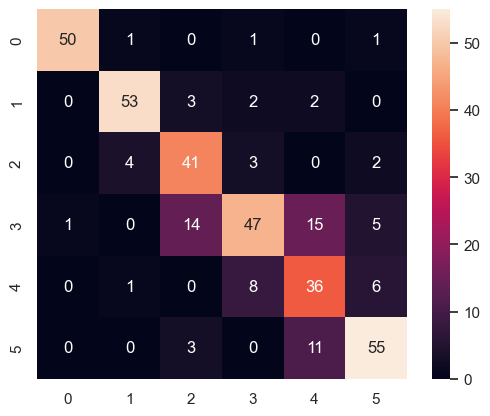

In [20]:
target_names=["0","1","2","3","4","5"]
mat=confusion_matrix(y_test, y_predict_final)
Matrizconf=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=target_names, yticklabels= target_names )
# plt.figure(figsize=(8, 6))
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# mat=plt.title('Confusion map ')
# Matrizconf.get_figure().savefig(base + r'Feature-Extraction/SVM/Confusionmap-'+txt+'-'+str(int(test_percentage*100))+'%.png')

In [ ]:
# print("none", n)
# print("nont none", nn)
# print("none_w", n_w)
# print("nont none_w", nn_w)
# print(len(pca_features))
# print( len(os.listdir("Image-Segmentation2/MEN")))
#pca_features = np.squeeze(np.array(pca_features[:-1]), axis = 2) # remove the third dimension

In [ ]:
# temp = np.array(pca_features)
# temp = np.squeeze(temp)
# print(temp[0])
#array = pca_features.flat(1)
# instead of pca_features to be array of arrays, we want it to be a 2d array



In [ ]:
# print(pca_features[0])
# print(pca_features.shape)

#pca_features = pca_features[:-1]


In [ ]:
# train the model
# accuracy = 0
# model = SVC(kernel='rbf', gamma=0.1, C=10)
# labels_encoded = LabelEncoder().fit_transform(labels)
# # partition the data into training and testing splits, using 75%
# trainingData, testData, trainingLabels, testLabels = train_test_split(pca_features, labels_encoded, test_size=0.2, random_state=42)
# trainingData, validationData, trainingLabels, validationLabels = train_test_split(trainingData, trainingLabels, test_size=0.2, random_state=42)
# trainingLabels = np.reshape(trainingLabels, trainingLabels.shape[0])

# def train_model_hog():
    
#     #model = SVC(random_state=42) # ramdom state is used to get the same results each time. It means that the model will be trained on the same data each time
#      # rbf means that the model will use the gaussian kernel as it stands for radial basis function

    

#     print("[INFO] evaluating...", flush=True)
    
#     # train the model
#     # how to continue to train SVM based on the previous model
#     # this is done by using the partial_fit method
#     # syntax: model.partial_fit(trainingData, trainingLabels)
    
    
#     # trainingData = trainingData.reshape(-1, 1)
#     # trainingLabels = trainingLabels.reshape(-1, 1)
#     # now padding the data to be 2D array
    
#     #print(trainingLabels)
#     model.fit(trainingData, trainingLabels)

#     # evaluate the model and update the accuracies list
#     acc = model.score(validationData, validationLabels)
#     accuracy = acc
#     print("[INFO] accuracy: {:.2f}%".format(acc * 100), flush=True)
#     # dump the classifier to file
#     print("[INFO] dumping classifier to file...", flush=True)
#     f = open("SVM_classifier.pkl", "wb") # wb = write binary
#     f.write(pickle.dumps(model))
#     f.close()


# train_model_hog()
# print(accuracy)

In [ ]:
# evaluate the model and update the accuracies list
# acc = model.score(testData, testLabels)
# accuracy = acc
# print("[INFO] accuracy: {:.2f}%".format(acc * 100), flush=True)
# # dump the classifier to file
# print("[INFO] dumping classifier to file...", flush=True)
# f = open("SVM_classifier.pkl", "wb") # wb = write binary
# f.write(pickle.dumps(model))
# f.close()

In [ ]:
# # train the model
# def train_model_hog():
#     k = 0
#     #model = SVC(random_state=42) # ramdom state is used to get the same results each time. It means that the model will be trained on the same data each time
#     model = SVC(kernel='rbf', gamma=0.01, C=10) # rbf means that the model will use the gaussian kernel as it stands for radial basis function
  
#     labels_data = pd.read_csv("HOG_PCA_FEATURES.csv", header=None, sep=',')

#     data_temp = np.array(labels_data)
#     for j in range (len(labels_data)):
#         temp = data_temp[j, 1].replace("[", "")
#         temp = temp.replace("\n", "")
#         temp = temp.replace("]", "")
#         temp= temp.split(" ")
#         temp = np.array(temp)
#         if(temp.__contains__('')):
#             temp = np.delete(temp, np.where(temp == ''))
#         data.append(np.array(temp, dtype=np.float32))
#         labels.append(labels_data.iloc[j, 0])

#     labels_data = pd.read_csv("HOG_PCA_FEATURES.csv", header=None, sep=',')

#     data_temp = np.array(labels_data)
#     for j in range (len(labels_data)):
#         temp = data_temp[j, 1].replace("[", "")
#         temp = temp.replace("\n", "")
#         temp = temp.replace("]", "")
#         temp= temp.split(" ")
#         temp = np.array(temp)
#         if(temp.__contains__('')):
#             temp = np.delete(temp, np.where(temp == ''))
#         #print(data_temp)
#         data.append(np.array(temp, dtype=np.float32))
#         labels.append(labels_data.iloc[j, 0])
    
#         data = np.array(data, dtype="float")
#         labels = LabelEncoder().fit_transform(labels)
#         # partition the data into training and testing splits, using 75%
#         trainingData, testData, trainingLabels, testLabels = train_test_split(data, labels, test_size=0.25, random_state=42)
        

#         print("[INFO] evaluating...", flush=True)
        
#         # train the model
#         # how to continue to train SVM based on the previous model
#         # this is done by using the partial_fit method
#         # syntax: model.partial_fit(trainingData, trainingLabels)
#         model.fit(trainingData, trainingLabels)

#         # evaluate the model and update the accuracies list
#         acc = model.score(testData, testLabels)
#         print("[INFO] accuracy: {:.2f}%".format(acc * 100), flush=True)
#         # dump the classifier to file
#         print("[INFO] dumping classifier to file...", flush=True)
#         f = open("SVM_classifier.pkl", "wb") # wb = write binary
#         f.write(pickle.dumps(model))
#         f.close()